# Proyecto
## Modelos Computacionales II
### Melannie Aranza Martínez Velasco


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
#dataset
base_dir = r'C:/Users/melan/OneDrive/Desktop/Neurociencias-2025-2/S06_proyecto\dataset'
train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'testing')

In [6]:
# Imágenes por clase: entrenamiento
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    print(f"{category}: {len(os.listdir(category_path))} imágenes")

glioma: 1321 imágenes
meningioma: 1339 imágenes
notumor: 1595 imágenes
pituitary: 1457 imágenes


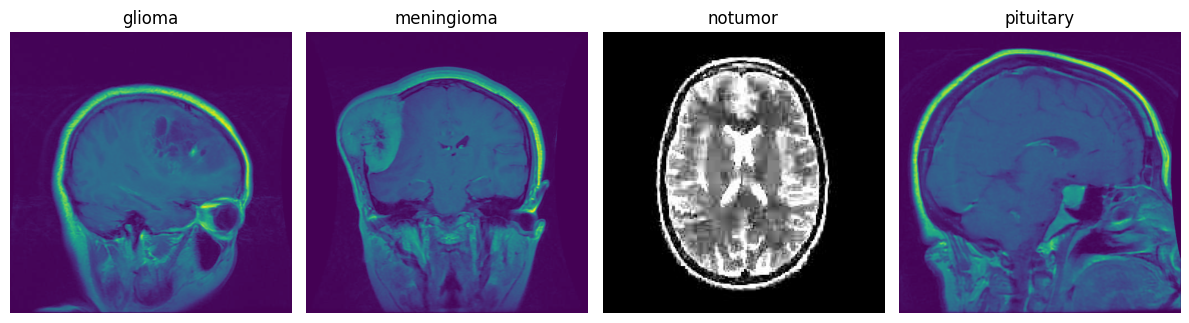

In [9]:
# Imágenes
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
for i, category in enumerate(['glioma', 'meningioma', 'notumor', 'pituitary']):
    path = os.path.join(train_dir, category)
    img_path = os.path.join(path, random.choice(os.listdir(path)))
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(category)
    axs[i].axis('off')
plt.tight_layout()
plt.show()

In [12]:
# aumento y preprocesamiento de datos
img_size = (160, 160)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [18]:
# CNN p
model = Sequential()

# Capa 1 - Convolución + Pooling
model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa 2 - Convolución + Pooling
model.add(Conv2D(filters=60, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa 3 - Convolución + Pooling
model.add(Conv2D(filters=120, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Capa aplanamiento + capa densa
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))  # regularización

# Capa de salida
model.add(Dense(units=4, activation='softmax'))  # clasificación multiclase

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 158, 158, 30)        │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 79, 79, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 77, 77, 60)          │          16,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 38, 38, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 36, 36, 120)         │          64,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 18, 18, 120)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 38880)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       4,976,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,059,304 (19.30 MB)

 Trainable params: 5,059,304 (19.30 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Entrenamiento del modelo
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=test_gen
)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.5382 - loss: 1.0234 - val_accuracy: 0.7551 - val_loss: 0.6418
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 172s 964ms/step - accuracy: 0.7411 - loss: 0.6270 - val_accuracy: 0.7742 - val_loss: 0.6180
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 147s 822ms/step - accuracy: 0.8005 - loss: 0.5088 - val_accuracy: 0.8230 - val_loss: 0.4583
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 107s 598ms/step - accuracy: 0.8521 - loss: 0.4168 - val_accuracy: 0.8230 - val_loss: 0.4684
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 107s 599ms/step - accuracy: 0.8666 - loss: 0.3585 - val_accuracy: 0.7750 - val_loss: 0.4980
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 110s 613ms/step - accuracy: 0.8664 - loss: 0.3511 - val_accuracy: 0.8749 - val_loss: 0.3045
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 106s 591ms/step - accuracy: 0.8884 - loss: 0.3031 - val_accuracy: 0.8398 - val_loss: 0.4002
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 108s 601ms/step - accuracy: 0.9079 - lo

In [29]:
!pip install seaborn



 Precisión global en datos de prueba: 89.78%
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 159ms/step

 Reporte de Clasificación por Clase:

              precision    recall  f1-score   support

      glioma       0.90      0.88      0.89       300
  meningioma       0.86      0.71      0.77       306
     notumor       0.90      1.00      0.95       405
   pituitary       0.93      0.97      0.95       300

    accuracy                           0.90      1311
   macro avg       0.90      0.89      0.89      1311
weighted avg       0.90      0.90      0.89      1311



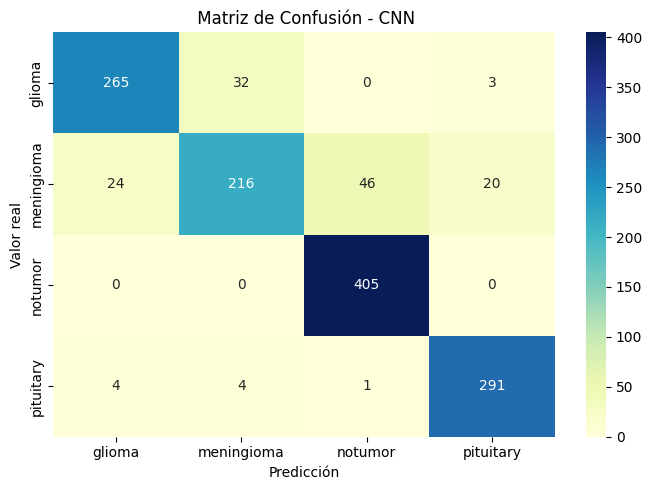

In [31]:
# Evaluación del modelo en el conjunto de prueba

# desempeño global
eval_result = model.evaluate(test_gen, verbose=0)
test_acc = eval_result[1]
print(f"\n Precisión global en datos de prueba: {test_acc:.2%}")

# predicciones y clases reales
predicciones = model.predict(test_gen)
etiquetas_predichas = np.argmax(predicciones, axis=1)
etiquetas_reales = test_gen.classes
nombres_clases = list(test_gen.class_indices.keys())

# reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix
reporte = classification_report(etiquetas_reales, etiquetas_predichas, target_names=nombres_clases)
print("\n Reporte de Clasificación por Clase:\n")
print(reporte)

# matriz de confusión
cm = confusion_matrix(etiquetas_reales, etiquetas_predichas)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=nombres_clases,
            yticklabels=nombres_clases)

plt.title(" Matriz de Confusión - CNN")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


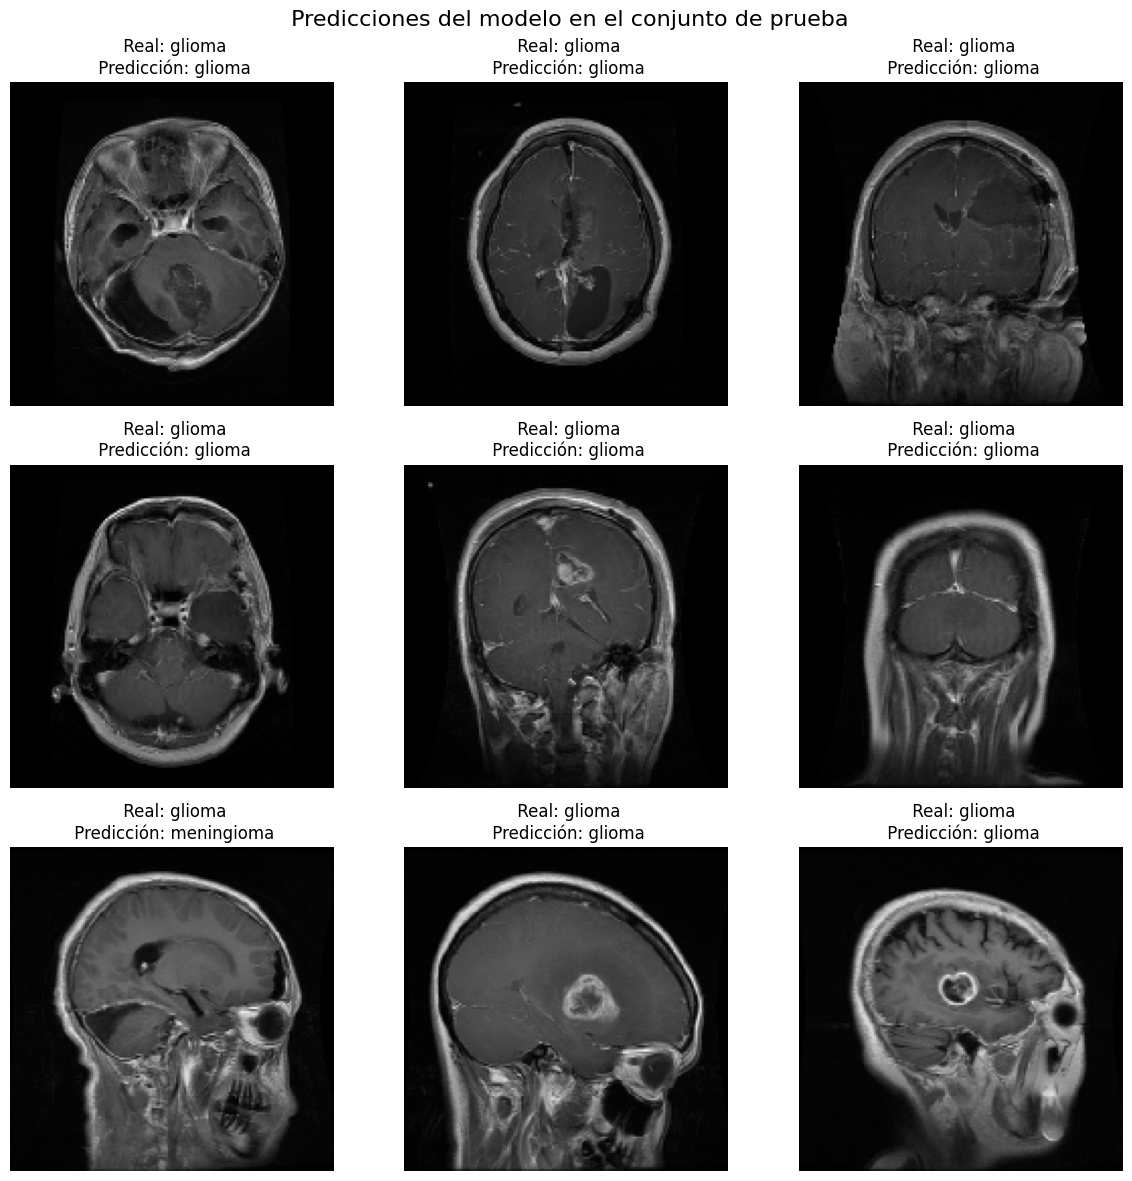

In [32]:
# visualización de predicciones del modelo en imágenes reales

nombres_clases = list(test_gen.class_indices.keys())

plt.figure(figsize=(12, 12))
for i in range(9):
    # Obtener lote de imágenes y etiquetas (uno a la vez)
    imagenes, etiquetas = test_gen[i]
    
    # predicción del modelo sobre esa imagen
    salida = model.predict(imagenes)
    
    clase_real = np.argmax(etiquetas[0])
    clase_predicha = np.argmax(salida[0])
    
    # mostrar imagen
    plt.subplot(3, 3, i + 1)
    plt.imshow(imagenes[0])
    plt.title(f" Real: {nombres_clases[clase_real]}\n Predicción: {nombres_clases[clase_predicha]}")
    plt.axis('off')

plt.suptitle(" Predicciones del modelo en el conjunto de prueba", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


**Análisis de resultados**

El modelo distingui+o con mayor precisión algunas clases: pituitary y notumor. Las métricas fueron altas, entonces parece que aprendió a reconocer bien los patrones de estas dos clases. Aunque también hubieron clases con menor precisión: glioma y meningioma. Como que las confundía, tal  vez es porque son tumores con características similares.

**Posibles causas de errores**

- Algunas carpetas tenían más imágenes que otras, entonces podría haber un sesgo hacia las clases con más imágenes. 
- La similitud visual entre glioma y meningioma.
- No todas las imágenes tienen la misma calidad, contraste, etc.

**Sugerencias para mejorar el rendimiento**
- Más formas de aumentar los datos, como girar las imágenes, cambiarles un poco el brillo o moverlas tantito. Se lograría más variedad.
- Cambiar la cantidad de filtros, el tamaño de las capas, o el tipo de función que activa las neuronas.
- Poner más imágenes o hacer que haya más equilibrio entre las clases, porque estaba desbalanceada la cantidad. 


**Interpretabilidad del modelo**

- Precisión general: precisión total del 93%, lo cual está bastante bien, en la mayoría de los casos pudo predecir correctamente la clase de la imagen.

- Resultados por clase (F1-score):

* Glioma: 0.92
* Meningioma: 0.85
* No Tumor: 0.96
* Pituitary: 0.98

Los resultados más altos fueron en las imágenes que no tienen tumor y en los tumores pituitarios.


- ¿Dónde se equivocó más?
Más errores en glioma y meningioma. Por lo que ya había mencionado de la similitud visual.







